# Projeto 2
**Luis Felipe Souza**

**Pedro Rubens de Paula**

## Objetivo do Trabalho

   Nosso objetivo com esse trabalho é analisar a relação entre a quantidade de consumo alcoólico de um país e alguns possíveis indicativos do excesso ou ausêncio mesmo, como PIB per capta, temperatura média anual, acesso á água potável e proporcção de homens e mulheres.

##  Importando Bibliotecas e Definindo Função de Regressão

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; 
import os
from scipy.stats import norm, probplot
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\luisf\OneDrive\Área de Trabalho\Insper\2°Sem\C-Dados\Projetos\Projeto 2


In [36]:
def regress(X,Y):
    '''
    X: coluna(s) do DataFrame que serão utilizadas como variável(is) preditoras/explicativas (independente(s))
    Y: coluna do DataFrame que será utilizada como variável resposta (dependente)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

## Definindo datasheets

**dados**: datasheet contendo média anual de consumo alcoólico por pessoa em cada país, incluindo dados de consumo médio de doses mensais de cerveja, destilados e vinho. 

**gdp**: tabela em excel contendo os valores de PIB per capita por páis. 

**ratio**: tabela em excel contendo os valores de população de homens por mulheres vezes 100. 

**temp**: tabela contendo a média de temperatura anual por país. 

**water**: tabela contendo os valores decimais da porcentagem da população que tem acesso a água.

In [37]:
dados = pd.read_csv('drinks.csv')
temp = pd.read_excel('temp.xlsx')
gdp = pd.read_excel('gdp_percapita.xlsx')
water = pd.read_excel('water.xlsx')
ratio = pd.read_excel('sex_ratio.xlsx')
dados

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
5,Antigua & Barbuda,102,128,45,4.9
6,Argentina,193,25,221,8.3
7,Armenia,21,179,11,3.8
8,Australia,261,72,212,10.4
9,Austria,279,75,191,9.7


## Lapidando datasheet final
**merge**: usado para unir as diferentes listas

**dropna e drop_duplicates**: eliminar as linhas sem dados ou países repetidos

In [38]:
mergedTemp = pd.merge(dados, temp, on=['country'], how='left')
mergedRatio = pd.merge(mergedTemp, ratio, on=['country'], how='left')
mergedGdp = pd.merge(mergedRatio, gdp, on=['country'], how='left')
mergedWater = pd.merge(mergedGdp, water, on=['country'], how='left')
drop_reps = mergedWater.drop_duplicates(subset=None, keep='first', inplace=False)
final = drop_reps.dropna(inplace = False)
final

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,temperature,ratio,gdp,water
0,Afghanistan,0,0,0,0.0,16.0,105.0,5.1700,0.484
1,Albania,89,132,54,4.9,14.0,102.0,2.9800,0.878
2,Algeria,25,0,14,0.7,25.0,102.0,2.0600,0.924
4,Angola,217,57,45,5.9,23.0,97.8,0.5940,0.504
6,Argentina,193,25,221,8.3,15.0,94.8,7.9400,0.985
7,Armenia,21,179,11,3.8,12.0,87.9,1.1900,0.983
8,Australia,261,72,212,10.4,22.0,100.0,1.4400,0.999
9,Austria,279,75,191,9.7,7.0,95.1,1.7500,1.000
10,Azerbaijan,21,46,5,1.3,14.0,98.2,3.7900,0.866
11,Bahamas,122,176,51,6.3,25.0,94.0,-0.9280,0.987


## Informações preliminares dos dados

**describe**: usado para expor informações básicas sobre o datasheet final

**dtypes**: retorna informação sobre o tipo de dado de cada coluna

**corr**: retorna a correlação entre pares de colunas

In [39]:
final.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,temperature,ratio,gdp,water
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,109.427673,77.666667,51.540881,4.797484,19.761006,102.233962,3.101004,0.844792
std,103.402951,83.291517,82.954673,3.801115,8.664243,25.416423,3.928260,0.185186
min,0.000000,0.000000,0.000000,0.000000,-15.000000,84.500000,-5.220000,0.330000
25%,20.000000,5.500000,1.000000,1.300000,13.000000,96.100000,0.951000,0.739500
50%,77.000000,60.000000,8.000000,4.400000,23.000000,98.600000,2.740000,0.928000
75%,192.500000,120.000000,59.000000,7.450000,27.000000,102.000000,5.035000,0.987000
max,376.000000,438.000000,370.000000,14.400000,30.000000,325.000000,22.800000,1.000000


In [40]:
final.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
temperature                     float64
ratio                           float64
gdp                             float64
water                           float64
dtype: object

In [41]:
correlacao = final.corr()
correlacao

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,temperature,ratio,gdp,water
beer_servings,1.000000,0.451152,0.537005,0.836485,-0.493861,-0.201302,-0.070865,0.447015
spirit_servings,0.451152,1.000000,0.188370,0.628314,-0.339432,-0.088488,-0.045759,0.414198
wine_servings,0.537005,0.188370,1.000000,0.670542,-0.571680,-0.122328,-0.198738,0.407489
total_litres_of_pure_alcohol,0.836485,0.628314,0.670542,1.000000,-0.579624,-0.210244,-0.105340,0.400734
temperature,-0.493861,-0.339432,-0.571680,-0.579624,1.000000,0.230799,0.076927,-0.415336
ratio,-0.201302,-0.088488,-0.122328,-0.210244,0.230799,1.000000,0.108237,0.081587
gdp,-0.070865,-0.045759,-0.198738,-0.105340,0.076927,0.108237,1.000000,-0.049227
water,0.447015,0.414198,0.407489,0.400734,-0.415336,0.081587,-0.049227,1.000000


## Gráficos preliminares dos dados

**scatter**: exibe um gráfico com os em X e Y.
    
**hist**: exibe uma aproximação da distribuição numérica entre de Y em X. 

**sns**: biblioteca usada para fazer um heatmap.

Text(0, 0.5, 'Temperatura Média')

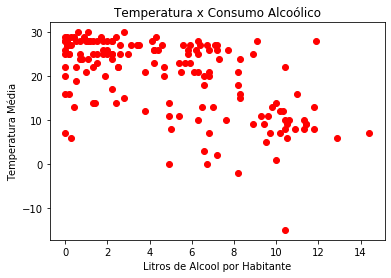

In [42]:
plt.scatter(final.total_litres_of_pure_alcohol, final.temperature, c = 'red')
plt.title('Temperatura x Consumo Alcoólico')
plt.xlabel('Litros de Alcool por Habitante')
plt.ylabel('Temperatura Média')

Text(0, 0.5, 'PIB per capta')

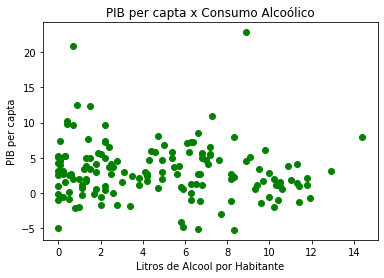

In [43]:
plt.scatter(final.total_litres_of_pure_alcohol, final.gdp, c='green')
plt.title('PIB per capta x Consumo Alcoólico')
plt.xlabel('Litros de Alcool por Habitante')
plt.ylabel('PIB per capta')

Text(0, 0.5, 'Relação Homens/Mulheres')

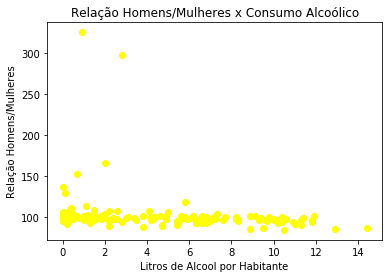

In [44]:
plt.scatter(final.total_litres_of_pure_alcohol, final.ratio, c='yellow')
plt.title('Relação Homens/Mulheres x Consumo Alcoólico')
plt.xlabel('Litros de Alcool por Habitante')
plt.ylabel('Relação Homens/Mulheres')

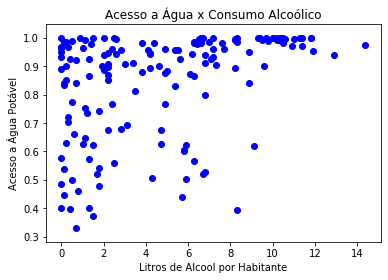

In [45]:
plt.scatter(final.total_litres_of_pure_alcohol, final.water, c='blue')
plt.title('Acesso a Água x Consumo Alcoólico')
plt.xlabel('Litros de Alcool por Habitante')
plt.ylabel('Acesso a Água Potável')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027C0E361DD8>,
      dtype=object)

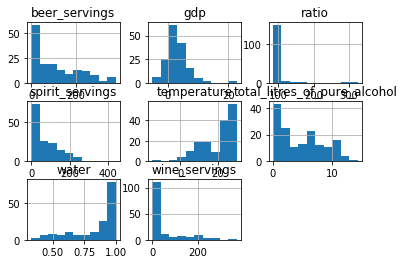

In [46]:
final.hist()

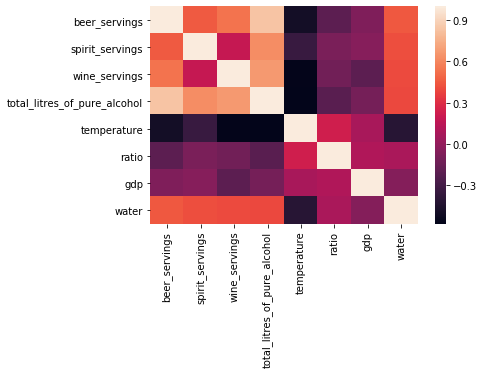

In [47]:
sns.heatmap(correlacao)

## Regressão Linear

In [48]:
X = final[['temperature', 'ratio', 'gdp', 'water']]
Y = final['total_litres_of_pure_alcohol']
results = regress(X,Y)
results.summary()

C:\Users\luisf\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     total_litres_of_pure_alcohol   R-squared:                       0.383
Model:                                      OLS   Adj. R-squared:                  0.367
Method:                           Least Squares   F-statistic:                     23.85
Date:                          Thu, 11 Jun 2020   Prob (F-statistic):           2.29e-15
Time:                                  21:19:43   Log-Likelihood:                -399.09
No. Observations:                           159   AIC:                             808.2
Df Residuals:                               154   BIC:                             823.5
Df Model:                                     4                                         
Covariance Type:                      nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.9329      1.685      4.114      0.000       3.604      10.262
temperature    -0.2012      0.032     -6.300      0.000      -0.264      -0.138
ratio          -0.0175      0.010     -1.754      0.081      -0.037       0.002
gdp            -0.0452      0.062     -0.731      0.466      -0.167       0.077
water           4.4639      1.459      3.059      0.003       1.581       7.347
==============================================================================
Omnibus:                        1.029   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.598   Jarque-Bera (JB):                1.028
Skew:                           0.060   Prob(JB):                        0.598
Kurtosis:                       2.625   Cond. No.                         941.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
print("Parece que a variancia é constante, e parece que a distribuiçao dos erros parece normal. Como podemos ver no proplot")
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
lin = regress(x_train,y_train)
lin.summary()

Parece que a variancia é constante, e parece que a distribuiçao dos erros parece normal. Como podemos ver no proplot


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     total_litres_of_pure_alcohol   R-squared:                       0.897
Model:                                      OLS   Adj. R-squared:                  0.891
Method:                           Least Squares   F-statistic:                     148.4
Date:                          Thu, 11 Jun 2020   Prob (F-statistic):           1.09e-55
Time:                                  21:22:38   Log-Likelihood:                -210.40
No. Observations:                           127   AIC:                             436.8
Df Residuals:                               119   BIC:                             459.6
Df Model:                                     7                                         
Covariance Type:                      nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.0443      0.829      3.670      0.000       1.402       4.687
temperature        -0.0311      0.019     -1.673      0.097      -0.068       0.006
ratio              -0.0013      0.004     -0.293      0.770      -0.010       0.008
gdp                 0.0170      0.029      0.581      0.563      -0.041       0.075
water              -2.0895      0.774     -2.698      0.008      -3.623      -0.556
beer_servings       0.0192      0.002     12.336      0.000       0.016       0.022
spirit_servings     0.0170      0.002     10.208      0.000       0.014       0.020
wine_servings       0.0151      0.002      7.242      0.000       0.011       0.019
==============================================================================
Omnibus:                      115.969   Durbin-Watson:                   2.199
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1164.040
Skew:                           3.292   Prob(JB):                    1.71e-253
Kurtosis:                      16.290   Cond. No.                     1.84e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

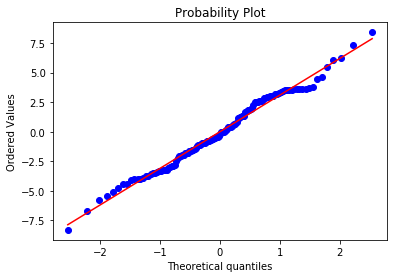

In [50]:
probplot(lin.resid,dist='norm',plot=plt);

In [51]:
x_test_c = sm.add_constant(x_test)
y_pred = lin.predict(x_test_c)
np.mean((y_test -  y_pred)**2)

7.197361690720907

## Regressão Método 'Random Forest'

In [52]:
random = RandomForestRegressor()
random.fit(x_train,y_train)

C:\Users\luisf\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [53]:
y_pred_rf = random.predict(x_test)
np.mean((y_test - y_pred_rf)**2)

6.965021875000002

In [54]:
X.shape

(159, 4)

In [55]:
X = final[['temperature', 'ratio', 'gdp', 'water','beer_servings','spirit_servings','wine_servings']]
Y = final['total_litres_of_pure_alcohol']
results = regress(X,Y)
results.summary()

C:\Users\luisf\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     total_litres_of_pure_alcohol   R-squared:                       0.876
Model:                                      OLS   Adj. R-squared:                  0.870
Method:                           Least Squares   F-statistic:                     152.7
Date:                          Thu, 11 Jun 2020   Prob (F-statistic):           3.62e-65
Time:                                  21:19:44   Log-Likelihood:                -271.34
No. Observations:                           159   AIC:                             558.7
Df Residuals:                               151   BIC:                             583.2
Df Model:                                     7                                         
Covariance Type:                      nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.7421      0.778      4.809      0.000       2.205       5.279
temperature        -0.0258      0.017     -1.543      0.125      -0.059       0.007
ratio              -0.0009      0.005     -0.186      0.853      -0.010       0.008
gdp                 0.0157      0.028      0.550      0.583      -0.041       0.072
water              -3.1129      0.731     -4.257      0.000      -4.558      -1.668
beer_servings       0.0190      0.001     13.313      0.000       0.016       0.022
spirit_servings     0.0169      0.002     10.890      0.000       0.014       0.020
wine_servings       0.0162      0.002      9.018      0.000       0.013       0.020
==============================================================================
Omnibus:                      119.597   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              899.174
Skew:                           2.839   Prob(JB):                    5.58e-196
Kurtosis:                      13.172   Cond. No.                     1.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
lin = regress(x_train,y_train)
lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     total_litres_of_pure_alcohol   R-squared:                       0.897
Model:                                      OLS   Adj. R-squared:                  0.891
Method:                           Least Squares   F-statistic:                     148.4
Date:                          Thu, 11 Jun 2020   Prob (F-statistic):           1.09e-55
Time:                                  21:19:44   Log-Likelihood:                -210.40
No. Observations:                           127   AIC:                             436.8
Df Residuals:                               119   BIC:                             459.6
Df Model:                                     7                                         
Covariance Type:                      nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.0443      0.829      3.670      0.000       1.402       4.687
temperature        -0.0311      0.019     -1.673      0.097      -0.068       0.006
ratio              -0.0013      0.004     -0.293      0.770      -0.010       0.008
gdp                 0.0170      0.029      0.581      0.563      -0.041       0.075
water              -2.0895      0.774     -2.698      0.008      -3.623      -0.556
beer_servings       0.0192      0.002     12.336      0.000       0.016       0.022
spirit_servings     0.0170      0.002     10.208      0.000       0.014       0.020
wine_servings       0.0151      0.002      7.242      0.000       0.011       0.019
==============================================================================
Omnibus:                      115.969   Durbin-Watson:                   2.199
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1164.040
Skew:                           3.292   Prob(JB):                    1.71e-253
Kurtosis:                      16.290   Cond. No.                     1.84e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

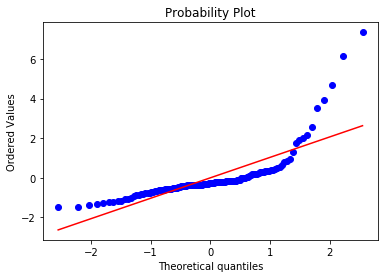

In [57]:
probplot(lin.resid,dist='norm',plot=plt);